In [110]:

!pwd
#/tf/capstone2/src

/tf/capstone2/data/app/breast-cancer-cnn/src


In [2]:
cd ..

/tf/capstone2/data/app/breast-cancer-cnn


In [3]:
cd src/

/tf/capstone2/data/app/breast-cancer-cnn/src


In [4]:
from image_pipeline import *
from image_convolv import *
from bc_plotting import *
from bc import *

In [5]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [6]:
# CNN without building/training from scratch
cnn = CNN()
#model = keras.models.load_model('../models/saved_model_adadelta.h5')
model = keras.models.load_model('../models/saved_cnn_model.h5')
cnn.model = model
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [7]:
# Goal is to isolate holdout data and load pre-build model to run evaluate methods
# and get plots looking nice


In [56]:
#root_dir = '../data/BreaKHis_v1/histology_slides/breast'
#image_size = (153, 234, 3) # (456, 700, 3) # ( 153, 234, 3)

#ip = read_images(root_dir, ['200X'])
#ip.resize(shape = image_size)
brief_mode = False
ip = run_pipeline(brief_mode=False) # sets ip images_filename_list, and images_list

first image shape (460, 700, 3)
first names entry SOB_B_A-14-22549AB-200-001.png
images_list should have list of 2013 patients x images, filenames of shape 460 
first image shape (460, 700, 3)
images_filename_list should have list of 2013 patients * images
first names entry SOB_B_A-14-22549AB-200-001.png
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '001', 'image_size': (460, 700, 3)}


In [57]:
# Turns data into arrays
ip.vectorize() # sets ip features and tumor_class_vector
ip.double_the_benigns() 

features shape (2013, 224, 288, 3)
attribs (dict) len 2013
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '001', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '002', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '003', 'image_size': (460, 700, 3)}
{'tumor_class': 'B', 'biopsy_procedure': 'SOB', 'tumor_type': 'A', 'year': '14', 'slide_id': '22549AB', 'mag': '200', 'seq': '004', 'image_size': (460, 700, 3)}
tumor_class vector num malig 1390 out of 2013 samples
tumor_class vector looks like [0 0 0 ... 1 1 1]
number of distinct patients: 81
shapes (2013,) (2013,) (2013, 224, 288, 3)
shapes X y to append (623, 224, 288, 3) (623,) 
post append shapes (2636,) (2013,) (2636, 224, 288, 3)


623

In [58]:
# To destry/ignore groups, override
ip.group_list = np.arange(0, len(ip.group_list))
# shuffle! 
X, y, groups, filename_list = shuffle_all(ip.features, ip.tumor_class_vector, ip.group_list, ip.images_filename_list)

In [59]:
num_diffs = test_integrities(y, groups, filename_list, ip.images_attributes)

len and y: (2636,) [0 0 0 ... 0 1 1]


In [60]:
num_diffs

0

In [111]:
# check out data
ip.images_attributes

{'SOB_B_A-14-22549AB-200-001.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '001',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-002.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '002',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-003.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '003',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-004.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': '200',
  'seq': '004',
  'image_size': (460, 700, 3)},
 'SOB_B_A-14-22549AB-200-005.png': {'tumor_class': 'B',
  'biopsy_procedure': 'SOB',
  'tumor_type': 'A',
  'year': '14',
  'slide_id': '22549AB',
  'mag': 

In [50]:
# Get holdout data

In [61]:
# get train/test split while keeping slide-ids grouped together, to isolate holdouts
X_train, X_holdout, y_train, y_holdout, groups_tr, groups_hold, filename_tr, filename_hold  = \
            train_holdouts_split_by_group(X, y, \
            groups=groups, filename_list=filename_list, holdout_pct=0.1)


in train_holdouts_split_by_group, shapes of X and y, groups, and fns (2636, 224, 288, 3) (2636,) 2636 2636
groups: [2410, 2126, 2595, 2310, 1767, 2144, 2117, 896, 736, 1168, 1457, 1086, 1333, 704, 967, 2490, 2458, 2627, 1391, 2628, 1720, 150, 1321, 2403, 1555, 1319, 1692, 1676, 313, 1146, 719, 1681, 1254, 1786, 120, 1371, 478, 341, 996, 2098, 2040, 173, 2188, 524, 2424, 2021, 928, 125, 1421, 2359]
(2372, 224, 288, 3) (264, 224, 288, 3)
2372 264
sample holdout filenames: ['SOB_M_MC-14-16456-200-006.png', 'SOB_M_DC-14-12312-200-007.png', 'SOB_B_PT-14-21998AB-200-016.png', 'SOB_M_LC-14-13412-200-009.png', 'SOB_B_A-14-22549G-200-023.png', 'SOB_B_F-14-9133-200-010.png', 'SOB_M_DC-14-20636-200-025.png', 'SOB_M_PC-14-15687B-200-001.png', 'SOB_M_DC-14-16875-200-017.png', 'SOB_B_F-14-9133-200-015.png', 'SOB_B_PT-14-21998AB-200-044.png', 'SOB_B_TA-14-16184-200-031.png', 'SOB_B_PT-14-21998AB-200-052.png', 'SOB_M_DC-14-17901-200-021.png', 'SOB_B_A-14-22549G-200-021.png', 'SOB_B_TA-14-3411F-200-003

In [62]:
X_holdout.shape #(244, 153, 234, 3)
X_holdout[:1,:1, :1, :5]


array([[[[211, 102, 156]]]], dtype=uint8)

In [40]:
#X_holdout = X_holdout.astype(np.float32)
#X_holdout = X_holdout.astype('float32')
#X_holdout /= 255.0   # expected 183 -> .717.  If values are too small, normalization happened twice

#X_holdout[:1,:1, :1, :5]

In [63]:
df_hold = get_dataframe(y_holdout, groups_hold, filename_hold, ip.images_attributes)
print('got df_hold {}'.format(df_hold.iloc[0]))

got df_hold index                                           0
file                SOB_M_MC-14-16456-200-006.png
group                                        1767
y                                               1
tumor_class                                     M
biopsy_procedure                              SOB
tumor_type                                     MC
year                                           14
slide_id                                    16456
mag                                           200
seq                                           006
image_size                          (460, 700, 3)
Name: 0, dtype: object


In [64]:
df_hold

,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size
0,0,SOB_M_MC-14-16456-200-006.png,1767,1,M,SOB,MC,14,16456,200,006,"(460, 700, 3)"
1,1,SOB_M_DC-14-12312-200-007.png,704,1,M,SOB,DC,14,12312,200,007,"(460, 700, 3)"
2,2,SOB_B_PT-14-21998AB-200-016.png,2403,0,B,SOB,PT,14,21998AB,200,016,"(460, 700, 3)"
3,3,SOB_M_LC-14-13412-200-009.png,1555,1,M,SOB,LC,14,13412,200,009,"(460, 700, 3)"
4,4,SOB_B_A-14-22549G-200-023.png,2098,0,B,SOB,A,14,22549G,200,023,"(460, 700, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,SOB_M_DC-14-9461-200-023.png,1474,1,M,SOB,DC,14,9461,200,023,"(460, 700, 3)"
260,260,SOB_M_DC-14-17614-200-023.png,1070,1,M,SOB,DC,14,17614,200,023,"(460, 700, 3)"
261,261,SOB_M_PC-14-15704-200-018.png,1928,1,M,SOB,PC,14,15704,200,018,"(460, 700, 3)"
262,262,SOB_M_DC-14-16188-200-003.png,936,1,M,SOB,DC,14,16188,200,003,"(460, 700, 3)"


In [65]:

df_results = evaluate_model(cnn, X_holdout, y_holdout, df_hold)

X_holdout (before rescale) values look like [[[[211 102 156]]]]
X_holdout values look like [[[[0.827451  0.4       0.6117647]]]]
score from model.evaluate [0.4529104873989568, 0.81439394]
predict results 
[[0.24405946 0.75594056]
 [0.30826607 0.6917339 ]
 [0.7904447  0.20955531]
 [0.34028822 0.65971184]
 [0.32820085 0.6717991 ]
 [0.84087855 0.15912145]
 [0.3264118  0.6735882 ]
 [0.82814527 0.1718548 ]
 [0.30977523 0.69022477]
 [0.805306   0.194694  ]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       134
           1       0.74      0.95      0.84       130

    accuracy                           0.81       264
   macro avg       0.84      0.82      0.81       264
weighted avg       0.84      0.81      0.81       264

Test scores: [0.4529104873989568, 0.81439394]
Test accuracy: 0.81439394
got df_prob index                                           0
file                SOB_M_MC-14-16456-200-006.png
group                            

In [66]:
df_results

,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat
0,0,SOB_M_MC-14-16456-200-006.png,1767,1,M,SOB,MC,14,16456,200,006,"(460, 700, 3)",0.244059,0.755941,0.755941,1
1,1,SOB_M_DC-14-12312-200-007.png,704,1,M,SOB,DC,14,12312,200,007,"(460, 700, 3)",0.308266,0.691734,0.691734,1
2,2,SOB_B_PT-14-21998AB-200-016.png,2403,0,B,SOB,PT,14,21998AB,200,016,"(460, 700, 3)",0.790445,0.209555,0.790445,0
3,3,SOB_M_LC-14-13412-200-009.png,1555,1,M,SOB,LC,14,13412,200,009,"(460, 700, 3)",0.340288,0.659712,0.659712,1
4,4,SOB_B_A-14-22549G-200-023.png,2098,0,B,SOB,A,14,22549G,200,023,"(460, 700, 3)",0.328201,0.671799,0.671799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,SOB_M_DC-14-9461-200-023.png,1474,1,M,SOB,DC,14,9461,200,023,"(460, 700, 3)",0.290784,0.709216,0.709216,1
260,260,SOB_M_DC-14-17614-200-023.png,1070,1,M,SOB,DC,14,17614,200,023,"(460, 700, 3)",0.261549,0.738451,0.738451,1
261,261,SOB_M_PC-14-15704-200-018.png,1928,1,M,SOB,PC,14,15704,200,018,"(460, 700, 3)",0.324580,0.675421,0.675421,1
262,262,SOB_M_DC-14-16188-200-003.png,936,1,M,SOB,DC,14,16188,200,003,"(460, 700, 3)",0.257910,0.742090,0.742090,1


In [137]:
df_grp = df_results.groupby(['tumor_class', 'y_hat']).agg({  "file": pd.Series.nunique})
df_grp.reset_index()

,tumor_class,y_hat,file
0,B,0,90
1,B,1,43
2,M,0,6
3,M,1,124


In [134]:

# True Positives, by highest prob
print (len(df_results.query('y_hat == 1 & y == 1 ')) )
df_results.query('y_hat == 1 & y == 1 ').sort_values(['p_1'], ascending=False)[:10]

124


,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat
143,142,SOB_M_DC-14-9461-200-011.png,1462,1,M,SOB,DC,14,9461,200,011,"(460, 700, 3)",0.172478,0.827522,0.827522,1
149,148,SOB_M_DC-14-5694-200-005.png,1397,1,M,SOB,DC,14,5694,200,005,"(460, 700, 3)",0.185786,0.814214,0.814214,1
196,196,SOB_M_DC-14-9461-200-006.png,1459,1,M,SOB,DC,14,9461,200,006,"(460, 700, 3)",0.200738,0.799262,0.799262,1
154,153,SOB_M_DC-14-8168-200-002.png,1449,1,M,SOB,DC,14,8168,200,002,"(460, 700, 3)",0.201243,0.798757,0.798757,1
177,176,SOB_M_DC-14-2773-200-027.png,1257,1,M,SOB,DC,14,2773,200,027,"(460, 700, 3)",0.202541,0.797459,0.797459,1
172,171,SOB_M_DC-14-2980-200-008.png,1273,1,M,SOB,DC,14,2980,200,008,"(460, 700, 3)",0.202621,0.797379,0.797379,1
226,226,SOB_M_DC-14-2523-200-027.png,1222,1,M,SOB,DC,14,2523,200,027,"(460, 700, 3)",0.203373,0.796628,0.796628,1
121,121,SOB_M_DC-14-2773-200-029.png,1259,1,M,SOB,DC,14,2773,200,029,"(460, 700, 3)",0.203507,0.796493,0.796493,1
124,124,SOB_M_DC-14-2980-200-012.png,1277,1,M,SOB,DC,14,2980,200,012,"(460, 700, 3)",0.208924,0.791076,0.791076,1
42,42,SOB_M_DC-14-9461-200-071.png,1516,1,M,SOB,DC,14,9461,200,071,"(460, 700, 3)",0.220367,0.779633,0.779633,1


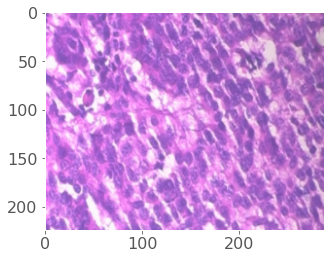

In [76]:
img = X_holdout[176]
plt.imshow(img)
plt.grid(b=None)




In [133]:
# Some True Negatives index 0, 4, 15, 47
print (len(df_results.query('y_hat != 1 & y == 0 ')) )
df_results.query('y_hat != 1 & y == 0 ').sort_values(['p_0'], ascending=False)[:6]

91


,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat
75,75,SOB_B_TA-14-15275-200-008.png,2524,0,B,SOB,TA,14,15275,200,008,"(460, 700, 3)",0.898375,0.101625,0.898375,0
230,230,SOB_B_A-14-29960CD-200-002.png,2109,0,B,SOB,A,14,29960CD,200,002,"(460, 700, 3)",0.891428,0.108572,0.891428,0
102,102,SOB_B_TA-14-15275-200-010.png,2526,0,B,SOB,TA,14,15275,200,010,"(460, 700, 3)",0.891280,0.108720,0.891280,0
84,84,SOB_B_F-14-23222AB-200-007.png,276,0,B,SOB,F,14,23222AB,200,007,"(460, 700, 3)",0.891276,0.108724,0.891276,0
50,50,SOB_B_F-14-23060CD-200-015.png,2281,0,B,SOB,F,14,23060CD,200,015,"(460, 700, 3)",0.890463,0.109537,0.890463,0
159,158,SOB_B_F-14-23060AB-200-017.png,252,0,B,SOB,F,14,23060AB,200,017,"(460, 700, 3)",0.889010,0.110990,0.889010,0


In [94]:
# False Positives
df_results.query('y_hat == 1 & y == 0 ').sort_values(['p_1'], ascending=False)[:16] 

,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat
27,27,SOB_B_F-14-25197-200-052.png,2320,0,B,SOB,F,14,25197,200,052,"(460, 700, 3)",0.243825,0.756175,0.756175,1
211,211,SOB_B_F-14-29960AB-200-002.png,320,0,B,SOB,F,14,29960AB,200,002,"(460, 700, 3)",0.245319,0.754681,0.754681,1
217,217,SOB_B_F-14-25197-200-034.png,289,0,B,SOB,F,14,25197,200,034,"(460, 700, 3)",0.248291,0.751709,0.751709,1
20,20,SOB_B_TA-14-16184CD-200-008.png,2571,0,B,SOB,TA,14,16184CD,200,008,"(460, 700, 3)",0.251103,0.748897,0.748897,1
123,123,SOB_B_TA-14-16184-200-007.png,522,0,B,SOB,TA,14,16184,200,007,"(460, 700, 3)",0.255650,0.744350,0.744350,1
88,88,SOB_B_F-14-25197-200-039.png,2307,0,B,SOB,F,14,25197,200,039,"(460, 700, 3)",0.260455,0.739545,0.739545,1
198,198,SOB_B_TA-14-16184CD-200-012.png,562,0,B,SOB,TA,14,16184CD,200,012,"(460, 700, 3)",0.261617,0.738383,0.738383,1
67,67,SOB_B_F-14-29960AB-200-015.png,333,0,B,SOB,F,14,29960AB,200,015,"(460, 700, 3)",0.261702,0.738298,0.738298,1
191,190,SOB_B_F-14-25197-200-058.png,2326,0,B,SOB,F,14,25197,200,058,"(460, 700, 3)",0.264581,0.735419,0.735419,1
224,224,SOB_B_TA-14-16184CD-200-015.png,565,0,B,SOB,TA,14,16184CD,200,015,"(460, 700, 3)",0.266839,0.733161,0.733161,1


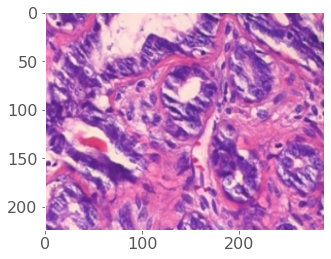

In [103]:
# Worst false positives, 27 was 76% likely, many Fibroadenoma's 
img = X_holdout[20]
plt.imshow(img)
plt.grid(b=None)

In [83]:
# False negatives, 6, 4DC and 2 PC
df_results.query('y_hat == 0 & y == 1 ')

,index,file,group,y,tumor_class,biopsy_procedure,tumor_type,year,slide_id,mag,seq,image_size,p_0,p_1,y_hat_p,y_hat
7,7,SOB_M_PC-14-15687B-200-001.png,1897,1,M,SOB,PC,14,15687B,200,001,"(460, 700, 3)",0.828145,0.171855,0.828145,0
21,21,SOB_M_DC-14-3909-200-027.png,1327,1,M,SOB,DC,14,3909,200,027,"(460, 700, 3)",0.670236,0.329764,0.670236,0
81,81,SOB_M_DC-14-14946-200-009.png,855,1,M,SOB,DC,14,14946,200,009,"(460, 700, 3)",0.590319,0.409681,0.590319,0
96,96,SOB_M_PC-14-9146-200-019.png,1995,1,M,SOB,PC,14,9146,200,019,"(460, 700, 3)",0.506829,0.493171,0.506829,0
111,111,SOB_M_DC-14-3909-200-017.png,1317,1,M,SOB,DC,14,3909,200,017,"(460, 700, 3)",0.767368,0.232632,0.767368,0
162,161,SOB_M_DC-14-14946-200-034.png,880,1,M,SOB,DC,14,14946,200,034,"(460, 700, 3)",0.575129,0.424871,0.575129,0


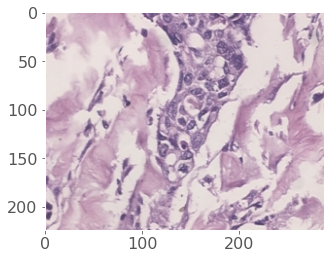

In [109]:
# Worst false negative, 82% certain is Papillary Carcinoma # 7, 111, 21
img = X_holdout[161]
plt.imshow(img)
plt.grid(b=None)

In [132]:
x = ['Malignant', 'Benign']
y = np.array([2000, 600])
y2 = np.array([1500, 450])
d = {
    "Total" : [200, 150],
    "Correctly Classified" : [180, 130]
}

Text(0.5, 1.0, 'bars with legend')

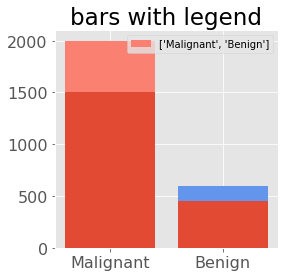

In [131]:
# Bar chart of results
fig, ax = plt.subplots(figsize=(4,4))

colors = (['salmon','cornflowerblue'])
ax.bar(x, y, color=colors, label=x)
ax.bar(x, y2)
ax.legend(prop={'size': 10})
ax.set_title('bars with legend')


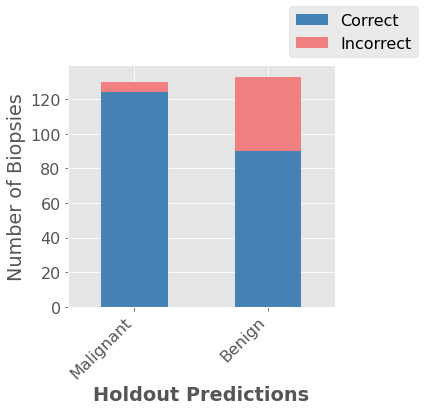

In [158]:
# tumor_class	y_hat	file
#0	B	0	90
#1	B	1	43
#2	M	0	6
#3	M	1	124

results = {
    "Correct" : [124, 90],
    "Incorrect" : [6, 43]   # totals 130, 133

}
df_plot = pd.DataFrame(results, index=x)

df_plot.plot(kind="bar", stacked=True, figsize=(6,6), color = ['steelblue', 'lightcoral'])
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xlabel('Holdout Predictions', fontweight='bold')
plt.ylabel('Number of Biopsies')
plt.xticks(rotation=45,horizontalalignment='right')
plt.tight_layout()

plt.savefig('../imgs/results_bar.png', dpi=200)

In [157]:
recall = 124 /130
recall

0.9538461538461539

In [114]:
score = cnn.model.evaluate(X_holdout, y_holdout, verbose=1)
score


[3.068732583161556, 0.8068182]

In [115]:
print(cnn.model.history)

None


In [ ]:
y_proba = cnn.model.predict(X_holdout)
y_proba



In [ ]:
# round to 1or 2 decimal place
y_proba2 = np.round(y_proba, 2)
y_proba2

In [ ]:
len(y_proba[:,0])
# This gets the index pos of the max
y_hat = np.argmax(y_proba2, axis=-1).reshape(-1,1)

# i also want the prob.
#y_proba2[[y_hat]]
np.indices

# predicted class 
y_hat



In [ ]:
print ('{} predicted M out of {}'.format(sum(y_hat), len(y_hat)))


print ('{} actual M out of {}'.format(sum(y_holdout), len(y_holdout)))
len(y_holdout)

In [ ]:
#arr = [[1, 2], [3, 4]]
#mask = [[1],[0]]
 

# There must be a numpy way
#y_holdout[:5]

In [ ]:
def mask_2D_by_col(arr2D, arrColToKeep):
    # There must be an array-wise operation to do this but 
    keep = []
    for i, item in enumerate(arr2D):
        #print (item)
        #print (arrColToKeep[i][0])
        #print (arr2D[i][arrColToKeep[i][0]])
        keep.append([arr2D[i][arrColToKeep[i][0]]])
    return keep   
    

In [ ]:
print(y_hat[:5])
print((y_hat[:5]+1) %2)  # how to change 0 to 1, 1 to 0
# we could also mask for the low proba's and plot it.
winner_proba = mask_2D_by_col(y_proba2, y_hat)
print(winner_proba[:5])

loser_proba = mask_2D_by_col(y_proba2, (y_hat+1)%2)  # not quite; flip y_hat?
print(loser_proba[:5])

In [ ]:
# now the pivot
#pd.pivot_table(g, values='X', rows='Y', cols='Z', margins=False, aggfunc='count')
flattened = [val for sublist in winner_proba for val in sublist]
flattened[:5]

flattened_loser = [val for sublist in loser_proba for val in sublist]
flattened_loser[:5]

In [ ]:
from collections import Counter
#Counter(['apple','red','apple','red','red','pear'])
counter_prob = Counter(list(flattened))
counter_prob

counter_prob_loser = Counter(list(flattened_loser))
counter_prob_loser

In [ ]:
plt.bar(counter_prob.keys(), counter_prob.values(), width=0.1, color='b')
# todo, add loser probs

In [ ]:
#histogram


In [113]:
num_predictions = len(y_proba[:,0])
x = np.linspace(0, num_predictions, num=num_predictions)

print ('shapes {} {}'.format(len(x), num_predictions))
#y = x
fig, ax = plt.subplots()
ax.scatter(x, y_proba[:,0], color='red')

# split into red and blue 

NameError: name 'y_proba' is not defined

In [ ]:
x = np.linspace(0, 1, num=100)
# for each probility in y_proba, x = max proba and color is whether its 
# actually in the B or M col

pos_pred = y_proba[:,1]
neg_pred = y_proba[:,0]
pos_pred[:5]
# initially plot both
# aggregate by counts, in buckets of size 0.1
# fancy trick?  pivot, dict, first bucketize/bin

y vs y_predictions look like [(1, 1.0), (1, 1.0), (0, 0.0), (1, 1.0), (0, 1.0), (0, 0.0), (1, 1.0), (1, 0.0), (1, 1.0), (0, 0.0), (0, 1.0), (0, 0.0), (0, 1.0), (1, 1.0), (0, 1.0)]


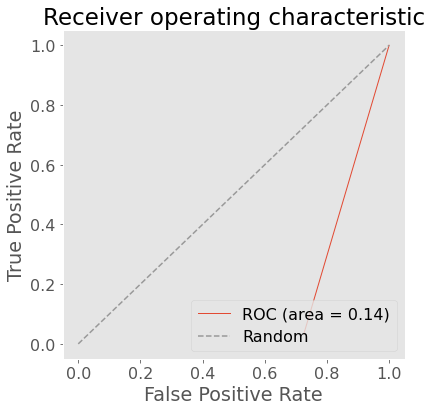

In [112]:
# ROC curve, use py files
plot_roc(X_holdout, y_holdout, cnn.model, 'roc_plot_test')

In [ ]:

features = ip.features
target = ip.tumor_class_vector
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = .2, random_state=1)


In [ ]:
cnn = CNN()
cnn.model = model

In [ ]:

score = cnn.model.evaluate(X_holdout, y_holdout, verbose=1)

In [ ]:
score

In [ ]:
plot_training_results(history, 10)

In [ ]:
type(cnn.history)

In [ ]:
cnn.fit(X_train, X_test, y_train, y_test)
cnn.load_and_featurize_data()
cnn.fit_model( batch_size=batch_size, epochs=nb_epoch, verbose=1, data_augmentation=True)

In [ ]:
cnn.history

In [ ]:
plot_training_results(history, 10)

In [ ]:

def plot_training_results(history, epochs):
    if history is None:
        return
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
plot_training_results(cnn.history, 10)